# Week 6 Assignment - Oussama Ennaciri:

1. Perform some movie recommendations and analysis for user 2:
- How many movies has this user watched?
- Plot a bar chart of their movie ratings. The bar chart should be the counts of the number of unique ratings.
    - Hint: the `sort_index()` function from pandas might be helpful to make the bar plot look nicer.
- What are some of user 2's top movies?
    - Hint: to get the actual movie titles, you can use pandas [merge](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html) function, although using the movie IDs is OK too.
- Find the most similar user in the movielens dataset to user 2 using at least 2 distance metrics. Be sure to use cosine distance as one of your choices.
- Recommend a few movies for user 2 using similarity metrics.
- Do the recommendations from this method make sense?
- Write a short analysis of the results, and justify which similarity metric(s) you used.

### Preparing the data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [192]:
ratings = pd.read_csv('ratings.csv')
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [194]:
movies = pd.read_csv('movies.csv')
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [139]:
movies.set_index('movieId', inplace=True)

In [140]:
new_df= pd.concat([movies, ratings.groupby('movieId').sum()], axis=1).sort_values(by='rating', ascending=False)
new_df

,title,genres,userId,rating,timestamp
movieId,,,,,
318,"Shawshank Redemption, The (1994)",Crime|Drama,95829.0,1404.0,3.769248e+11
356,Forrest Gump (1994),Comedy|Drama|Romance|War,101385.0,1370.0,3.861652e+11
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,90621.0,1288.5,3.492043e+11
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,85236.0,1165.5,3.502700e+11
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,85535.0,1161.0,3.200357e+11
...,...,...,...,...,...
30892,In the Realms of the Unreal (2004),Animation|Documentary,NaN,NaN,NaN
32160,Twentieth Century (1934),Comedy,NaN,NaN,NaN
32371,Call Northside 777 (1948),Crime|Drama|Film-Noir,NaN,NaN,NaN


We started by importing the essential libraries, preparing the data, we indexed our movies data frame. We created a new data frame by concatenating the movies and ratings data frames. We sorted the new data frame by the ratings column in descending order to show the highest rated movies at the top. This means that we can generally recommend the following movies to users :
The Shawshank Redemption (1994)
Forrest Gump (1994)
Pulp Fiction (1994)
The Matrix (1999)
The Silence of the Lambs (1991)

### User 2 Analysis

In [105]:
movie_count_user_2 = ratingsdf.loc[2]['movieId'].nunique()
movie_count_user_2

29

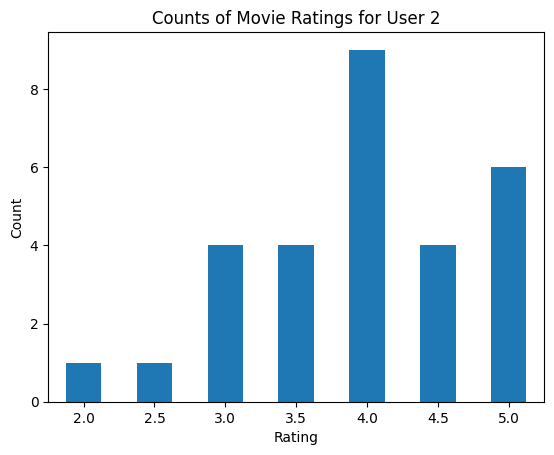

In [210]:
user2_ratings = ratings[ratings['userId'] == 2]
user2_rating_counts = user2_ratings['rating'].value_counts().sort_index()
user2_rating_counts.plot(kind='bar')
plt.title('Counts of Movie Ratings for User 2')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [202]:
user2_top_movies = pd.merge(user2_ratings, movies, on='movieId')
user2_top_movies = user2_top_movies.sort_values(by='rating', ascending=False)
user2_top_movies[['title', 'rating']].head(10)

,title,rating
28,The Jinx: The Life and Deaths of Robert Durst ...,5.0
27,Mad Max: Fury Road (2015),5.0
22,"Wolf of Wall Street, The (2013)",5.0
18,Warrior (2011),5.0
9,Step Brothers (2008),5.0
16,Inside Job (2010),5.0
2,Good Will Hunting (1997),4.5
8,"Dark Knight, The (2008)",4.5
10,Inglourious Basterds (2009),4.5
15,"Town, The (2010)",4.5


We later moved on to analyzing a specific user to get more particular recommendations (User 2). We counted 29 movies that they have rated. We plotted a bar chart of their movie ratings. We then identified some of user 2's top movies by using the merge function to get the actual movie titles:
The Jinx: The Life and Deaths of Robert Durst (2015)
Mad Max: Fury Road (2015)
The Wolf of Wall Street (2013)
Warrior (2011)
Step Brothers (2008)
Inside Job (2010)

### Recommending Movies to User 2

In [149]:
wide = ratings.pivot(index='userId', columns='movieId', values='rating')
wide.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [150]:
wide.fillna(-1, inplace=True)

In [151]:
cor = wide.T.corr()
cor

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.018916,0.059204,0.179894,0.121369,0.103828,0.141187,0.130393,0.052089,0.003243,...,0.064748,0.148329,0.191966,0.058442,0.135612,0.122529,0.259260,0.268676,0.086328,0.094546
2,0.018916,1.000000,-0.002936,-0.001895,0.015369,0.015436,0.025824,0.024174,-0.003570,0.065066,...,0.199690,0.010897,-0.004286,-0.005430,-0.008081,0.011038,0.006055,0.031115,0.025154,0.087520
3,0.059204,-0.002936,1.000000,-0.002646,0.007895,0.000028,-0.006534,0.007555,-0.003594,-0.006335,...,0.006577,0.005261,0.015396,-0.005467,0.003285,0.002749,0.019761,0.015210,-0.003342,0.014557
4,0.179894,-0.001895,-0.002646,1.000000,0.122238,0.069313,0.102479,0.060439,0.002010,0.018884,...,0.077143,0.116174,0.286354,0.041942,0.062982,0.165208,0.118940,0.124587,0.024487,0.060899
5,0.121369,0.015369,0.007895,0.122238,1.000000,0.298352,0.103712,0.429288,-0.004360,0.025950,...,0.060624,0.415991,0.098957,0.262230,0.141565,0.089978,0.149544,0.129392,0.256483,0.040026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.122529,0.011038,0.002749,0.165208,0.089978,0.048730,0.173475,0.082494,0.055799,0.058438,...,0.150507,0.084888,0.225334,0.035405,0.106694,1.000000,0.118918,0.188919,0.053318,0.089062
607,0.259260,0.006055,0.019761,0.118940,0.149544,0.139913,0.171027,0.176485,0.002997,-0.000328,...,0.077649,0.185288,0.179319,0.127417,0.100909,0.118918,1.000000,0.263745,0.142375,0.095325
608,0.268676,0.031115,0.015210,0.124587,0.129392,0.148414,0.305142,0.181102,0.085093,0.050028,...,0.130685,0.179219,0.169236,0.142148,0.147129,0.188919,0.263745,1.000000,0.112583,0.240936


In [186]:
cor.loc[2].sort_values(ascending=False)

userId
2      1.000000
366    0.300528
378    0.277953
417    0.277085
550    0.252587
         ...   
234   -0.007649
605   -0.008081
312   -0.008135
104   -0.009044
217   -0.013622
Name: 2, Length: 610, dtype: float64

In [200]:
movies_rated_5_by_366 = ratings[(ratings['userId'] == 366) & (ratings['rating'] == 5)]['movieId']
movies_rated_by_2 = ratings[ratings['userId'] == 2]['movieId']
movies_rated_5_by_366_not_rated_by_2 = movies_rated_5_by_366[~movies_rated_5_by_366.isin(movies_rated_by_2)]
movies_not_rated_by_2 = movies[movies['movieId'].isin(movies_rated_5_by_366_not_rated_by_2)]
print(movies_not_rated_by_2[['movieId', 'title']]) 

     movieId                  title
828     1089  Reservoir Dogs (1992)


We later moved to the collaborative filtering section to identify the most similar users to user 2. We transformed the ratings data frame from a long format to a wide format, we filled the missing values “NaN” with -1. We generated a Pearson correlation matrix between the users, and we sorted them from highest to lowest to find the most similar users, the top one being User 366. We filtered the movies rated 5 by user 366 and checked which of those movies were not rated by user 2 in order to make a recommendation. The result was Reservoir Dogs (1992).

In [143]:
from scipy.spatial.distance import pdist, squareform, euclidean

In [144]:
euclidean_distances = squareform(pdist(wide, metric=euclidean))
euclidean_df = pd.DataFrame(data=euclidean_distances, columns=wide.index, index=wide.index)
euclidean_df.loc[2].sort_values()

userId
2        0.000000
442     29.000000
461     30.495901
189     30.809901
508     31.488093
          ...    
448    171.200175
610    171.373860
599    185.184368
474    206.630709
414    232.408046
Name: 2, Length: 610, dtype: float64

In [141]:
cosine_distances = squareform(pdist(wide, metric='cosine'))
cosine_df = pd.DataFrame(cosine_distances, columns=wide.index, index=wide.index)
cosine_df.loc[2].sort_values()

userId
2      0.000000
442    0.042025
461    0.046059
189    0.046957
508    0.049443
         ...   
610    0.762312
448    0.817785
599    0.936812
474    0.975777
414    1.084648
Name: 2, Length: 610, dtype: float64

In [199]:
movies_rated_5_by_422 = ratings[(ratings['userId'] == 422) & (ratings['rating'] == 5)]['movieId']
movies_rated_by_2 = ratings[ratings['userId'] == 2]['movieId']
movies_rated_5_by_422_not_rated_by_2 = movies_rated_5_by_422[~movies_rated_5_by_422.isin(movies_rated_by_2)]
movies_not_rated_by_2 = movies[movies['movieId'].isin(movies_rated_5_by_422_not_rated_by_2)]
print(movies_not_rated_by_2[['movieId', 'title']]) 

      movieId                                              title
224       260          Star Wars: Episode IV - A New Hope (1977)
602       750  Dr. Strangelove or: How I Learned to Stop Worr...
704       922      Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)
896      1193             One Flew Over the Cuckoo's Nest (1975)
914      1213                                  Goodfellas (1990)
971      1272                                      Patton (1970)
1067     1387                                        Jaws (1975)
2049     2728                                   Spartacus (1960)


Then we found the most similar users using the Cosine distance are the same as using the Euclidian distance, the top one being User 422. We filtered again the movies rated 5 by user 422 and checked which of those movies were not rated by user 2 in order to make a recommendation. The results are the following:
Star Wars: Episode IV - A New Hope (1977)
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)
One Flew Over the Cuckoo's Nest (1975)
Goodfellas (1990)
Patton (1970)
Jaws (1975)
Spartacus (1960)

All the recommendations make sense because there is an overlap between the recommendations' genres and the user's faforite movies' genres. 

# Analysis/Summary

We started by importing the essential libraries, preparing the data, we indexed our movies data frame. We created a new data frame by concatenating the movies and ratings data frames. We sorted the new data frame by the ratings column in descending order to show the highest rated movies at the top. This means that we can generally recommend the following movies to users :
The Shawshank Redemption (1994)
Forrest Gump (1994)
Pulp Fiction (1994)
The Matrix (1999)
The Silence of the Lambs (1991)

We later moved on to analyzing a specific user to get more particular recommendations (User 2). We counted 29 movies that they have rated. We plotted a bar chart of their movie ratings. We then identified some of user 2's top movies by using the merge function to get the actual movie titles:
The Jinx: The Life and Deaths of Robert Durst (2015)
Mad Max: Fury Road (2015)
The Wolf of Wall Street (2013)
Warrior (2011)
Step Brothers (2008)
Inside Job (2010)

We later moved to the collaborative filtering section to identify the most similar users to user 2. We transformed the ratings data frame from a long format to a wide format, we filled the missing values “NaN” with -1. We generated a Pearson correlation matrix between the users, and we sorted them from highest to lowest to find the most similar users, the top one being User 366. We filtered the movies rated 5 by user 366 and checked which of those movies were not rated by user 2 in order to make a recommendation. The result was Reservoir Dogs (1992).

Then we found the most similar users using the Cosine distance are the same as using the Euclidian distance, the top one being User 422. We filtered again the movies rated 5 by user 422 and checked which of those movies were not rated by user 2 in order to make a recommendation. The results are the following:
Star Wars: Episode IV - A New Hope (1977)
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)
One Flew Over the Cuckoo's Nest (1975)
Goodfellas (1990)
Patton (1970)
Jaws (1975)
Spartacus (1960)

All the recommendations make sense because there is an overlap between the recommendations' genres and the user's faforite movies' genres. 


In [1]:
!jupyter nbconvert --to pdf Week_6_assignment_Oussama_Ennaciri.ipynb

[NbConvertApp] Converting notebook Week_6_assignment_Oussama_Ennaciri.ipynb to pdf
[NbConvertApp] Support files will be in Week_6_assignment_Oussama_Ennaciri_files/
[NbConvertApp] Making directory ./Week_6_assignment_Oussama_Ennaciri_files
[NbConvertApp] Writing 51088 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 72466 bytes to Week_6_assignment_Oussama_Ennaciri.pdf
